## Example1.4 Dow Jones Industrial Average

We used the fact that if $ x_t $ is the closing value of the DJIA on day $ t $ and

$
r_t = \frac{x_t - x_{t-1}}{x_{t-1}}
$

is the return (or percent change), then $ 1 + r_t = x_t / x_{t-1} $ and$^2$

$
r_t \approx \log(1 + r_t) = \log(x_t / x_{t-1}) = \log(x_t) - \log(x_{t-1}).
$

We see from the graph that on average $r_t \approx 0$ but there is a lot of variation and this variation is clustered. One problem is to predict the future variation.

[*********************100%***********************]  1 of 1 completed


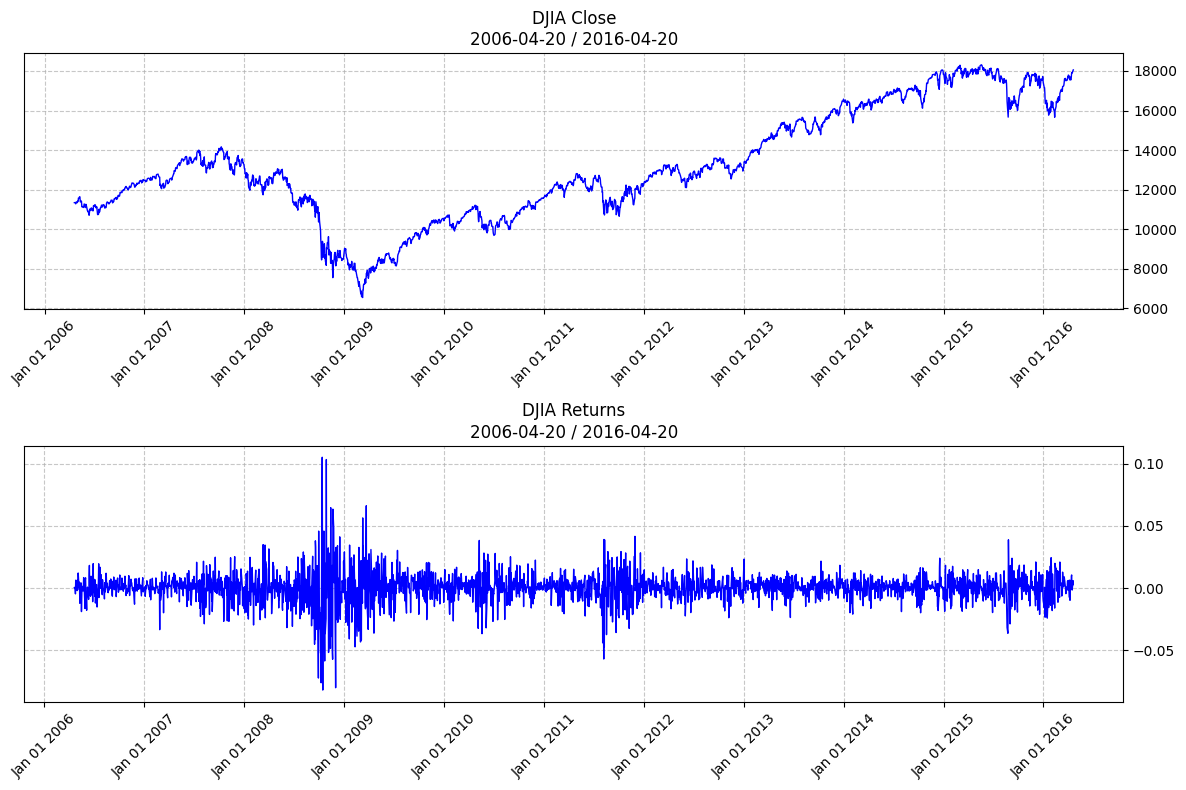

In [8]:
# Import required libraries
import pandas as pd  # For data manipulation and handling time series
import numpy as np  # For numerical operations like log and difference
import matplotlib.pyplot as plt  # For plotting the charts
import matplotlib.dates as mdates  # For formatting dates on the x-axis
import yfinance as yf  # For downloading financial data from Yahoo Finance

# Download Dow Jones Industrial Average (DJIA) data from Yahoo Finance
# '^DJI' is the ticker symbol for DJIA; specify the date range
djia = yf.download('^DJI', start='2006-04-20', end='2016-04-20')
djia = djia[['Close']]  # Keep only the 'Close' column (closing prices)

# Calculate log returns
# Log return = log(Close_t) - log(Close_{t-1}), which approximates percentage change
djia['Log_Return'] = np.log(djia['Close']).diff()

# Set up the figure size for the plot
# figsize=(12, 8) sets the width to 12 inches and height to 8 inches
plt.figure(figsize=(12, 8))

# First subplot: DJIA closing prices
plt.subplot(2, 1, 1)  # Create a subplot: 2 rows, 1 column, 1st plot
plt.plot(djia.index, djia['Close'], color='blue', linewidth=1)  # Plot closing prices with a blue line
plt.title('DJIA Close\n2006-04-20 / 2016-04-20', fontsize=12)  # Set title with date range
plt.ylabel('')  # Leave y-axis label empty to match the original chart
plt.grid(True, linestyle='--', alpha=0.7)  # Add a dashed grid for better readability

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))  # Format dates as 'Apr 20 2006'
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees to avoid overlap

# Format the y-axis
plt.gca().yaxis.tick_right()  # Move y-axis ticks to the right side
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2000))  # Set y-axis ticks at intervals of 2000

# Second subplot: DJIA log returns
plt.subplot(2, 1, 2)  # Create a subplot: 2 rows, 1 column, 2nd plot
plt.plot(djia.index, djia['Log_Return'], color='blue', linewidth=1)  # Plot log returns with a blue line
plt.title('DJIA Returns\n2006-04-20 / 2016-04-20', fontsize=12)  # Set title with date range
plt.ylabel('')  # Leave y-axis label empty to match the original chart
plt.grid(True, linestyle='--', alpha=0.7)  # Add a dashed grid for better readability

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))  # Format dates as 'Apr 20 2006'
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees to avoid overlap

# Format the y-axis
plt.gca().yaxis.tick_right()  # Move y-axis ticks to the right side
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.05))  # Set y-axis ticks at intervals of 0.05

# Adjust the layout to prevent overlap between subplots
plt.tight_layout()

# Display the plot
plt.show()